170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 45ms/step - accuracy: 0.3478 - loss: 1.7636 - val_accuracy: 0.5477 - val_loss: 1.2591
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.5710 - loss: 1.2032 - val_accuracy: 0.6020 - val_loss: 1.1113
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.6337 - loss: 1.0460 - val_accuracy: 0.6494 - val_loss: 0.9986
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.6693 - loss: 0.9366 - val_accuracy: 0.6728 - val_loss: 0.9343
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.6952 - loss: 0.8657 - val_accuracy: 0.6756 - val_loss: 0.9299
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.7185 - loss: 0.8114 - val_accuracy: 0.6878 - val_loss: 0.9042
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.7374 - loss: 0.7533 - val_accuracy: 0.7048 - val_loss: 0.8537
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.7543 -

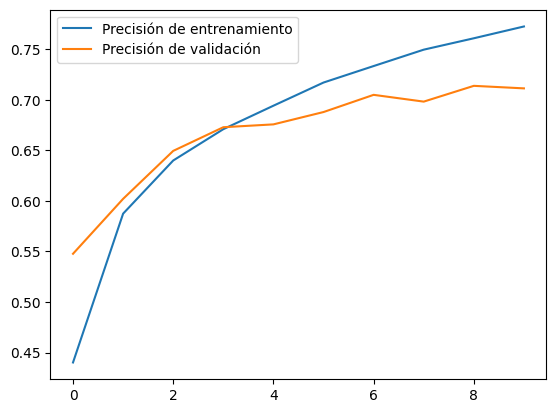

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Cargar dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar imágenes (valores entre 0 y 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Etiquetas categóricas
class_names = ['Avión', 'Auto', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

# Crear el modelo
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compilar el modelo
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Guardar el modelo en el almacenamiento de Colab
model.save('cifar10_classifier.h5')

# Visualizar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.legend()
plt.show()


In [2]:
from google.colab import files
files.download('cifar10_classifier.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np

# Cargar el modelo
model = tf.keras.models.load_model('cifar10_classifier.h5')

# Predicción en una imagen aleatoria del dataset
index = np.random.randint(0, len(x_test))
image = x_test[index]
label = y_test[index]

prediction = model.predict(image[np.newaxis, ...])
predicted_class = class_names[np.argmax(prediction)]

plt.imshow(image)
plt.title(f"Predicción: {predicted_class} (Real: {class_names[label[0]]})")
plt.show()
